## Comparing bbSelect to other selection methods

- The data has already been generated using the coverage_tests_all_methods.py and converage_test_bbSelect_parameters.py in ../data/coverage_tests

- This notebook reports visualisations to understand and compare how well the methods have worked when looking at coverage and the "bb complexity" profile of the selections.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Visualisation settings
plt.rcParams['figure.figsize'] = [15,10]
sns.set(font_scale=2.1)
sns.set_style("darkgrid")
# Use colourblind-friendly colour palette
cp = sns.color_palette("colorblind")

%matplotlib inline

In [2]:
method_comparisons = pd.read_csv('../data/coverage_tests/coverage_testing_all_methods.csv')

# Tidy up the data

method_name_alias_dict = {
                            'som_coverage': 'bbSelect SOM with coverage',                    
                            'som': 'bbSelect SOM',
                            'classic_coverage': "bbSelect Classic with coverage", 
                            'classic' : 'bbSelect Classic',
                            'random' : 'Random selection',
                            'maxMin' : 'MaxMin selection',
                            'sphex' : 'Sphere Exclusion selection',
                            'kMeans' : 'k-Means selection',
}

method_name_alias_dict = {
    'classic' : 'bbSelect Classic',
    'som': 'bbSelect SOM',        
    'classic_coverage': "bbSelect Classic with coverage", 
    'som_coverage': 'bbSelect SOM with coverage', 
    'random' : 'Random selection',
    'maxMin' : 'MaxMin selection',
    'sphex' : 'Sphere Exclusion selection',
    'kMeans' : 'k-Means selection',
}

method_comparisons.rename({'method':'_method'}, axis = 1, inplace = True)
for i, line in method_comparisons.iterrows():
    if line['_method'] in ['som','classic']:
        if line['use_coverage']:
            method_comparisons.loc[i, 'method'] = line['_method']+'_coverage'
        else:
            method_comparisons.loc[i, 'method'] = line['_method']
    else:
        method_comparisons.loc[i, 'method'] = line['_method']
method_comparisons['method_name'] = method_comparisons['method'].apply(lambda x: method_name_alias_dict[x])

# Calculate the average, maximum, and minimum coverages across the pharmacophores
pharmacophore_columns = 'Donor,Acceptor,NegIonizable,PosIonizable,Aromatic,Hydrophobe'.split(',')
method_comparisons['average_coverage'] = method_comparisons[pharmacophore_columns].mean(axis = 1)
method_comparisons['max_coverage'] = method_comparisons[pharmacophore_columns].max(axis = 1)
method_comparisons['min_coverage'] = method_comparisons[pharmacophore_columns].min(axis = 1)

## Compare coverage across different selection methods
- This section looks to compare the average coverage achieved by each selection method across a range of selection sizes

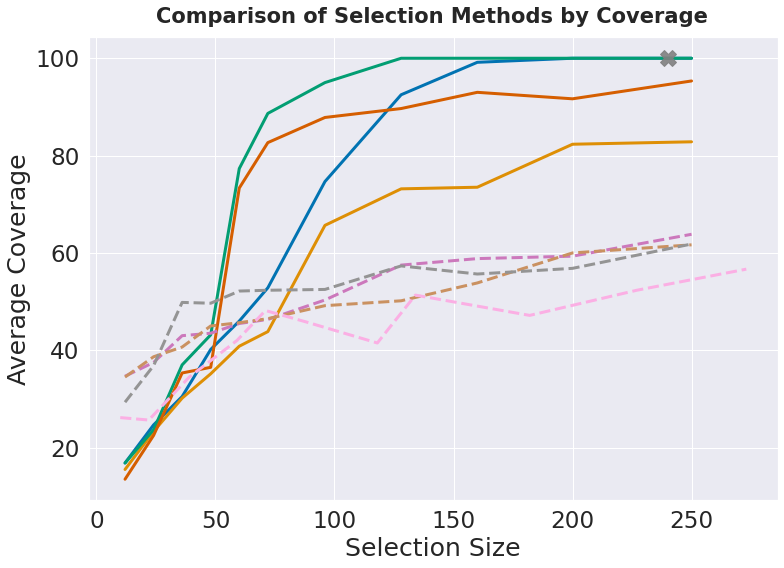

In [3]:
fig, axes = plt.subplots(figsize=(11, 8))

for i, method in enumerate(method_comparisons['method'].unique()):
    
    df_filtered = method_comparisons.query(f'method == "{method}"')
    descriptive_name = method_name_alias_dict.get(method, method)
    if df_filtered['_method'].values[0] in ['som', 'classic']:
        linestyle = '-'
    else:
        linestyle = '--'
    # Plot the line for average coverage
    sns.lineplot(data=df_filtered, x='n_select', y='average_coverage', ax=axes, color=cp[i], ci=None, label=descriptive_name, linewidth = 3, linestyle = linestyle, palette = 'colorblind', legend = None)



plt.plot(240,100,linewidth=4, marker ='X', fillstyle = 'full', markersize = 16, label = 'Full coverage', color = 'grey', alpha = 0.9)

axes.set_ylabel('Average Coverage')
axes.set_xlabel('Selection Size')
fig.suptitle('Comparison of Selection Methods by Coverage', fontsize = 21, x = 0.55, fontweight='bold')
fig.tight_layout()#rect=[0, 0, 1.3, 1])

plt.tight_layout()
plt.show()

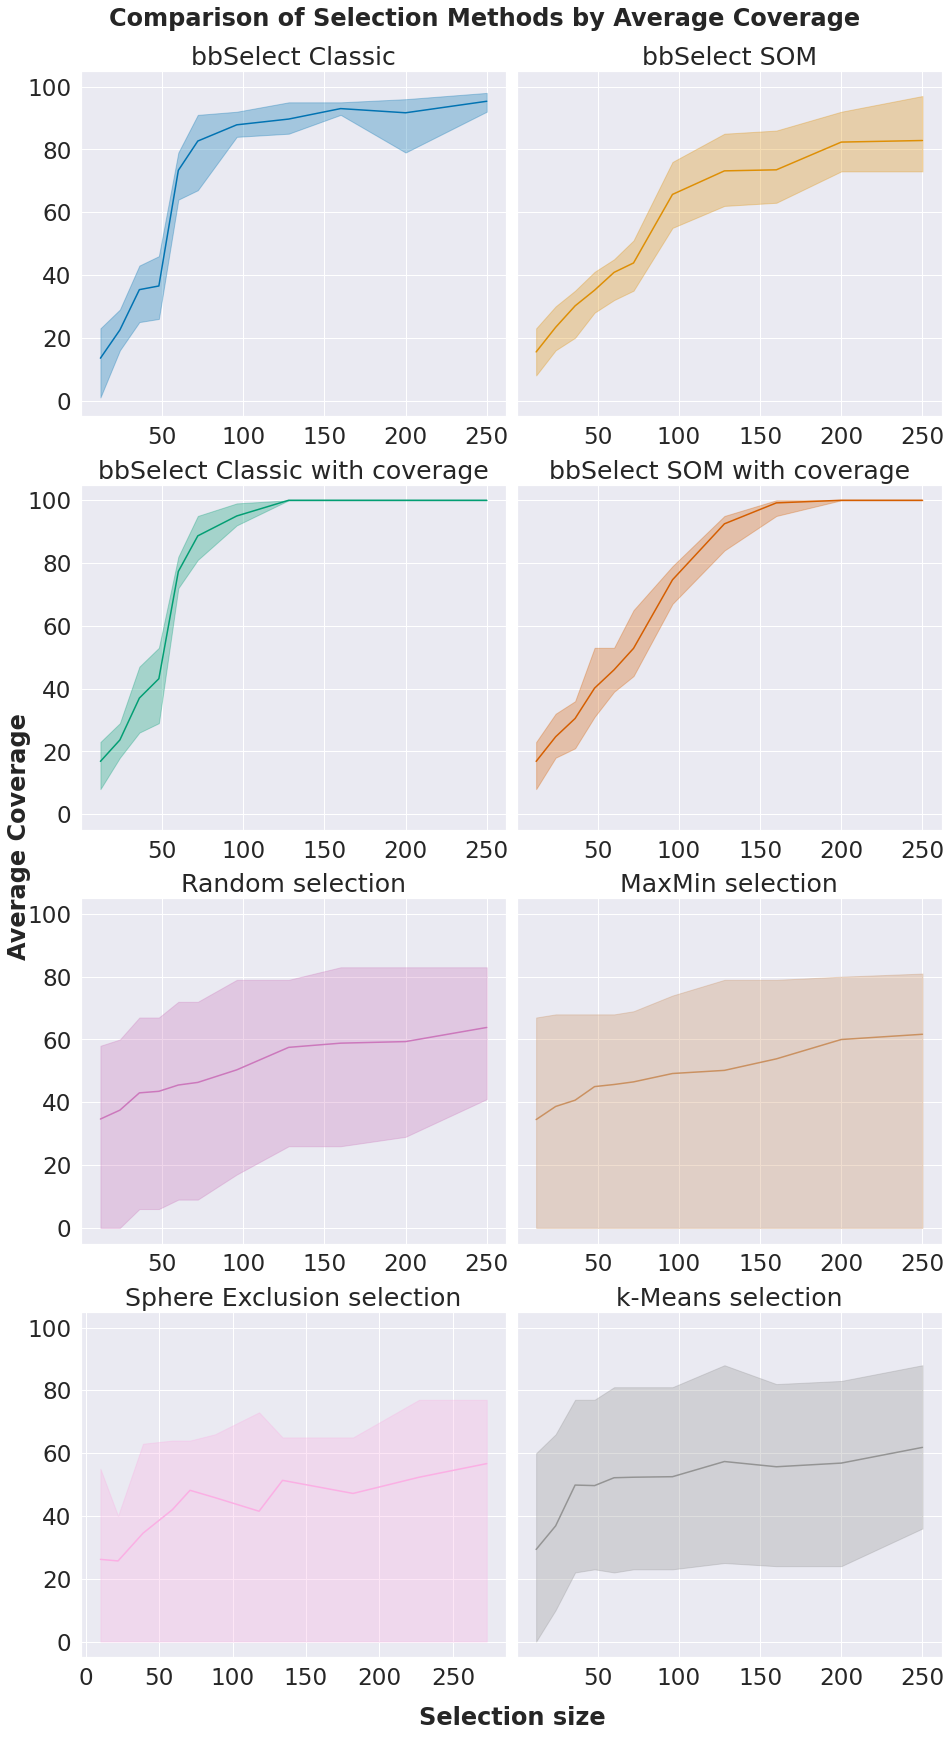

In [4]:
fig, ax = plt.subplots(4, 2, sharex = False, sharey = True, figsize=(13, 24))

for i, (axes, method) in enumerate(zip([x for xs in ax for x in xs], method_name_alias_dict.keys())):
    y_upper = method_comparisons.query(f'method == "{method}"')['max_coverage']
    y_lower = method_comparisons.query(f'method == "{method}"')['min_coverage']

    sns.lineplot(data = method_comparisons.query(f'method == "{method}"'), x='n_select', y = 'average_coverage', ax = axes, color = cp[i], ci = None)
    axes.fill_between(method_comparisons.query(f'method == "{method}"')['n_select'], y_lower, y_upper, color=cp[i], alpha=0.3)
    axes.title.set_text(method_name_alias_dict[method])
    axes.set_ylabel('')
    axes.set_xlabel('')
    #axes.set_xlabel('Selection Size')
    
fig.suptitle('Comparison of Selection Methods by Average Coverage\n', fontsize = 24, fontweight = 'bold')
fig.text(-0.01, 0.5, 'Average Coverage', va='center', rotation='vertical', fontsize=24, fontweight = 'bold')
fig.text(0.43,-0.01, 'Selection size', va='center', rotation='horizontal', fontsize=24, fontweight = 'bold')

fig.tight_layout()

## Compare bbComplexity score across different selection methods
- This section looks to compare the average bbComplexity score achieved by each selection method across a range of selection sizes

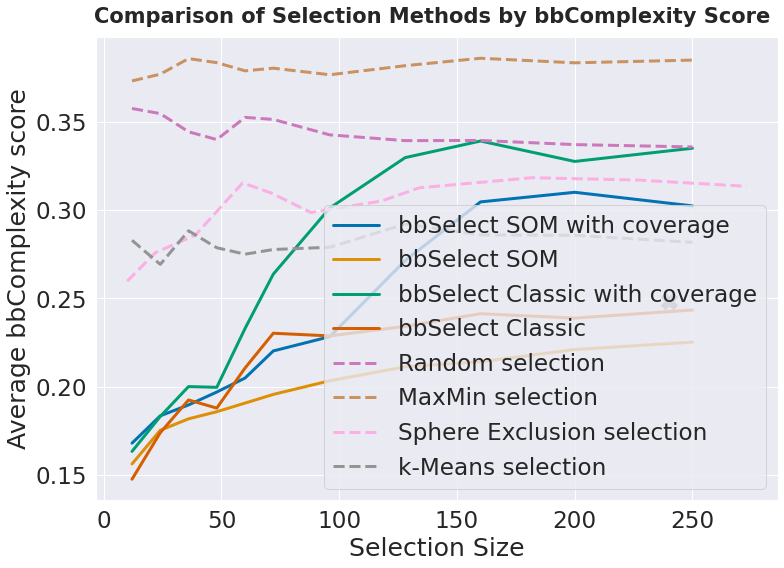

In [14]:
fig, axes = plt.subplots(figsize=(11, 8))

for i, method in enumerate(method_comparisons['method'].unique()):
    
    df_filtered = method_comparisons.query(f'method == "{method}"')
    descriptive_name = method_name_alias_dict.get(method, method)
    if df_filtered['_method'].values[0] in ['som', 'classic']:
        linestyle = '-'
    else:
        linestyle = '--'
    # Plot the line for average coverage
    sns.lineplot(data=df_filtered, x='n_select', y='MPO_mean', ax=axes, color=cp[i], ci=None, label=descriptive_name, linewidth = 3, linestyle = linestyle, palette = 'colorblind', legend = True)



plt.plot(240,0.2484,linewidth=3, marker ='X', fillstyle = 'full', markersize = 16, label = 'Full coverage', color = 'grey', alpha = 0.9)

axes.set_ylabel('Average bbComplexity score')
axes.set_xlabel('Selection Size')
fig.suptitle('Comparison of Selection Methods by bbComplexity Score', fontsize = 21, x = 0.55, fontweight='bold')
fig.tight_layout()#rect=[0, 0, 1.3, 1])

plt.tight_layout()
plt.show()

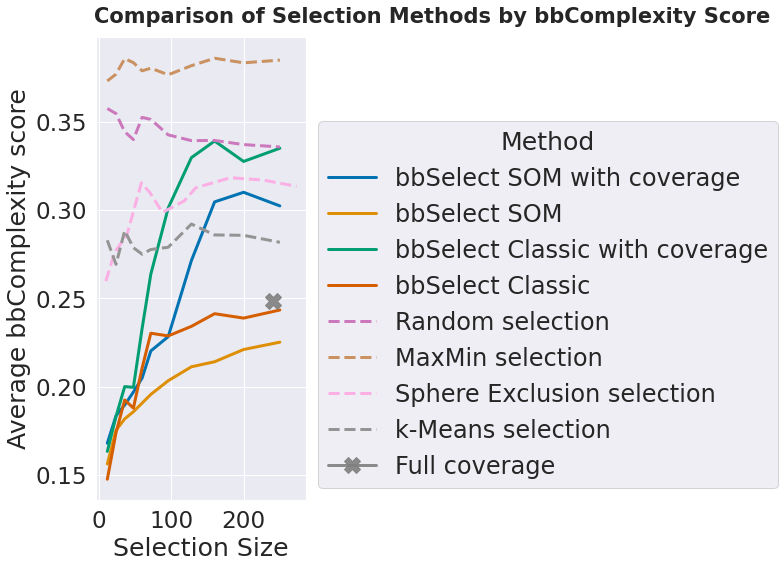

In [15]:
## This is just a duplicate of above but showing the Legend for printing purposes
fig, axes = plt.subplots(figsize=(11, 8))

for i, method in enumerate(method_comparisons['method'].unique()):
    
    df_filtered = method_comparisons.query(f'method == "{method}"')
    descriptive_name = method_name_alias_dict.get(method, method)
    if df_filtered['_method'].values[0] in ['som', 'classic']:
        linestyle = '-'
    else:
        linestyle = '--'
    # Plot the line for average coverage
    sns.lineplot(data=df_filtered, x='n_select', y='MPO_mean', ax=axes, color=cp[i], ci=None, label=descriptive_name, linewidth = 3, linestyle = linestyle, palette = 'colorblind', legend = True)



plt.plot(240,0.2484,linewidth=3, marker ='X', fillstyle = 'full', markersize = 16, label = 'Full coverage', color = 'grey', alpha = 0.9)
legend = axes.legend(title='Method', fontsize=24, fancybox = True, loc='lower left', bbox_to_anchor=(1, 0))
axes.set_ylabel('Average bbComplexity score')
axes.set_xlabel('Selection Size')
fig.suptitle('Comparison of Selection Methods by bbComplexity Score', fontsize = 21, x = 0.55, fontweight='bold')
fig.tight_layout()#rect=[0, 0, 1.3, 1])

plt.tight_layout()
plt.show()

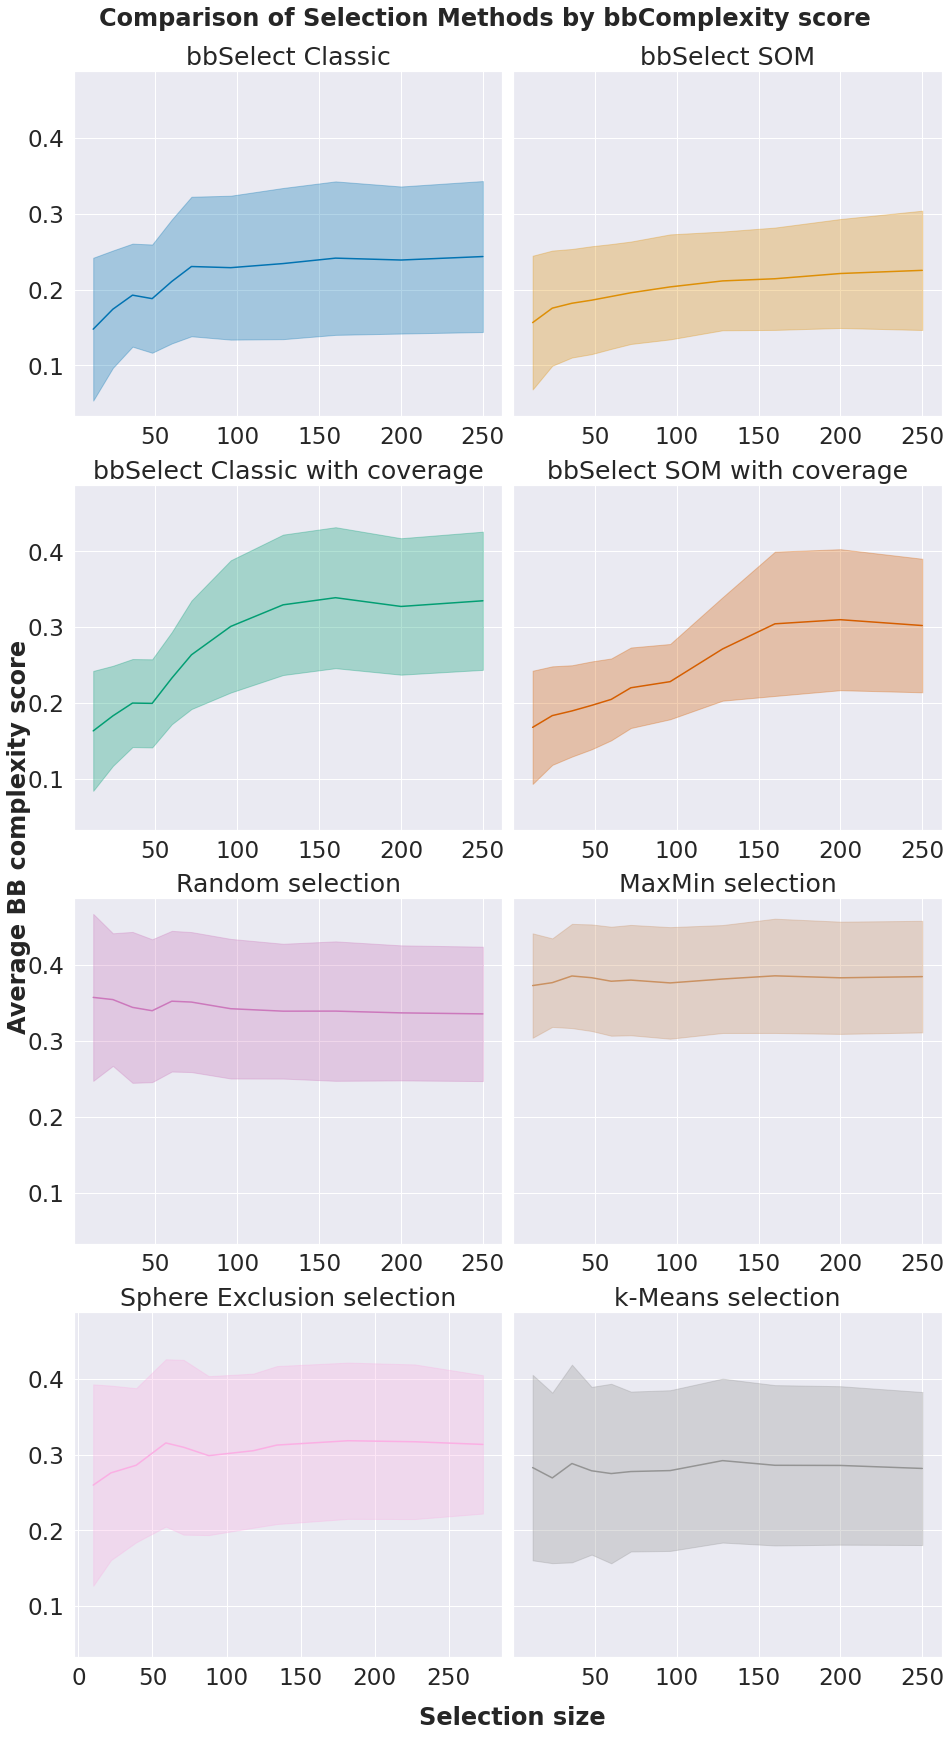

In [7]:
fig, ax = plt.subplots(4, 2, sharex = False, sharey = True, figsize=(13, 24))

for i, (axes, method) in enumerate(zip([x for xs in ax for x in xs], method_name_alias_dict.keys())):
    
    y_upper = method_comparisons.query(f'method == "{method}"')['MPO_mean'] + method_comparisons.query(f'method == "{method}"')['MPO_std']
    y_lower = method_comparisons.query(f'method == "{method}"')['MPO_mean'] - method_comparisons.query(f'method == "{method}"')['MPO_std']

    sns.lineplot(data = method_comparisons.query(f'method == "{method}"'), x='n_select', y = 'MPO_mean', ax = axes, color = cp[i], ci = None)
    axes.fill_between(method_comparisons.query(f'method == "{method}"')['n_select'], y_lower, y_upper, color=cp[i], alpha=0.3)
    axes.title.set_text(method_name_alias_dict[method])
    axes.set_ylabel('')
    axes.set_xlabel('')
    #axes.set_xlabel('Selection Size')
    
fig.suptitle('Comparison of Selection Methods by bbComplexity score\n', fontsize = 24, fontweight = 'bold')
fig.text(-0.01, 0.5, 'Average BB complexity score', va='center', rotation='vertical', fontsize=24, fontweight = 'bold')
fig.text(0.43,-0.01, 'Selection size', va='center', rotation='horizontal', fontsize=24, fontweight = 'bold')

fig.tight_layout()

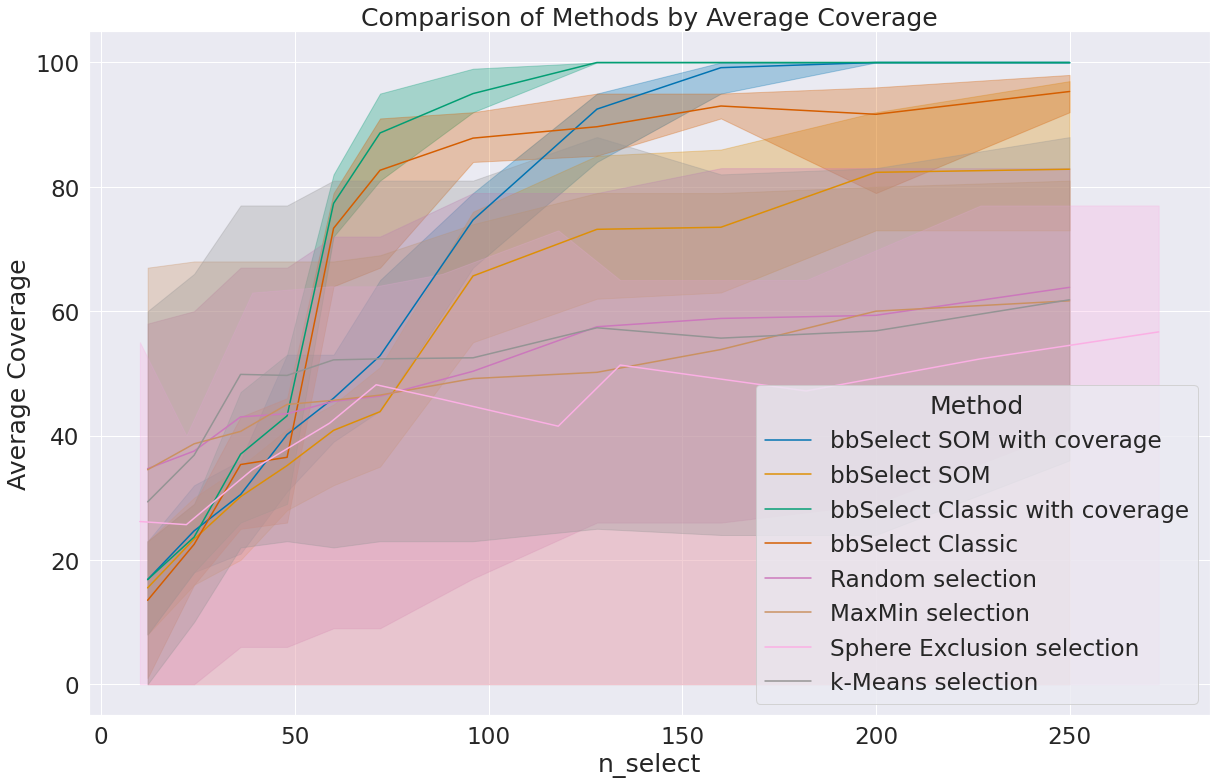

In [8]:
## Overlaying the values was confusing so this wasn't used in the end.

fig, axes = plt.subplots(figsize=(17, 11))

for i, method in enumerate(method_comparisons['method'].unique()):
    # Filter the data for the current method
    df_filtered = method_comparisons.query(f'method == "{method}"')
    
    # Extract the upper and lower bounds for the error region
    y_upper = df_filtered['max_coverage']
    y_lower = df_filtered['min_coverage']
    
    descriptive_name = method_name_alias_dict.get(method, method)
    
    # Plot the line for average coverage
    sns.lineplot(data=df_filtered, x='n_select', y='average_coverage', ax=axes, color=cp[i], ci=None, label=descriptive_name)
    
    # Add the fill between for error region
    axes.fill_between(df_filtered['n_select'], y_lower, y_upper, color=cp[i], alpha=0.3)

# Optional: Add legend, titles, or modify axes labels
axes.legend(title='Method')
axes.set_title('Comparison of Methods by Average Coverage')
axes.set_xlabel('n_select')
axes.set_ylabel('Average Coverage')

plt.tight_layout()
plt.show()

In [9]:
# Looked to pivot the table to make the same comparisons, but this wasn't required in the end

pivot_method_comparisons = pd.melt(method_comparisons, id_vars = ['n_select','method'], value_vars = pharmacophore_columns, var_name = 'pharmacophore', value_name = 'coverage')

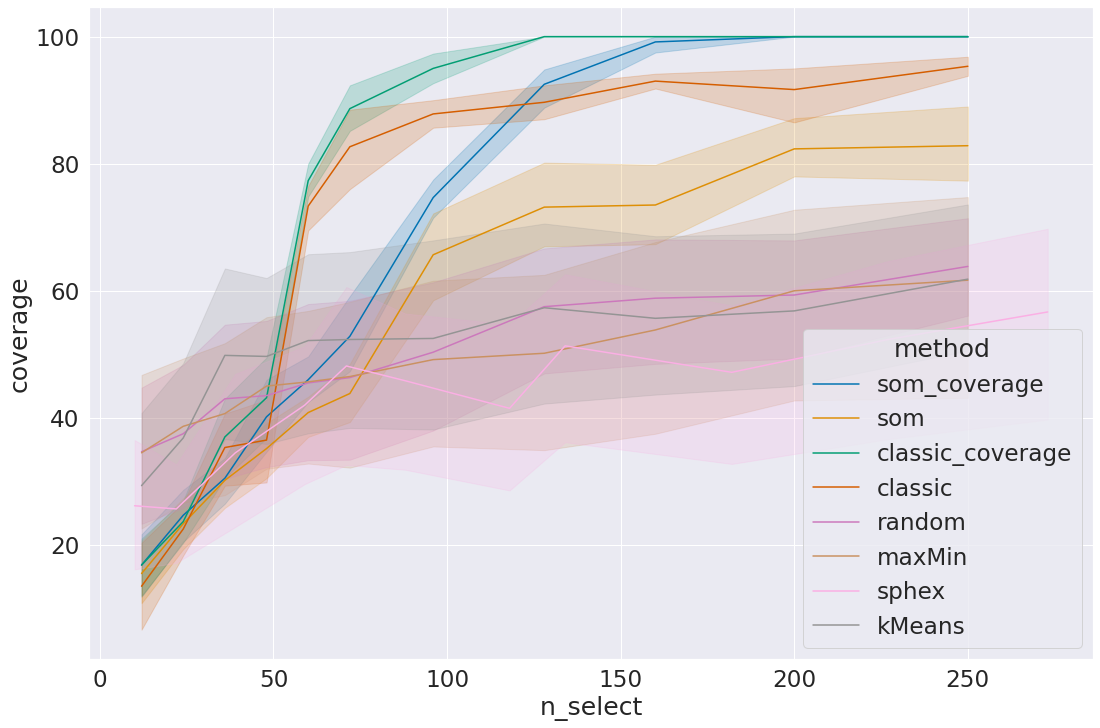

In [10]:
plt.rcParams['figure.figsize'] = [18,12]
fig = sns.lineplot(data = pivot_method_comparisons, x='n_select', y = 'coverage', hue = 'method', palette = 'colorblind')

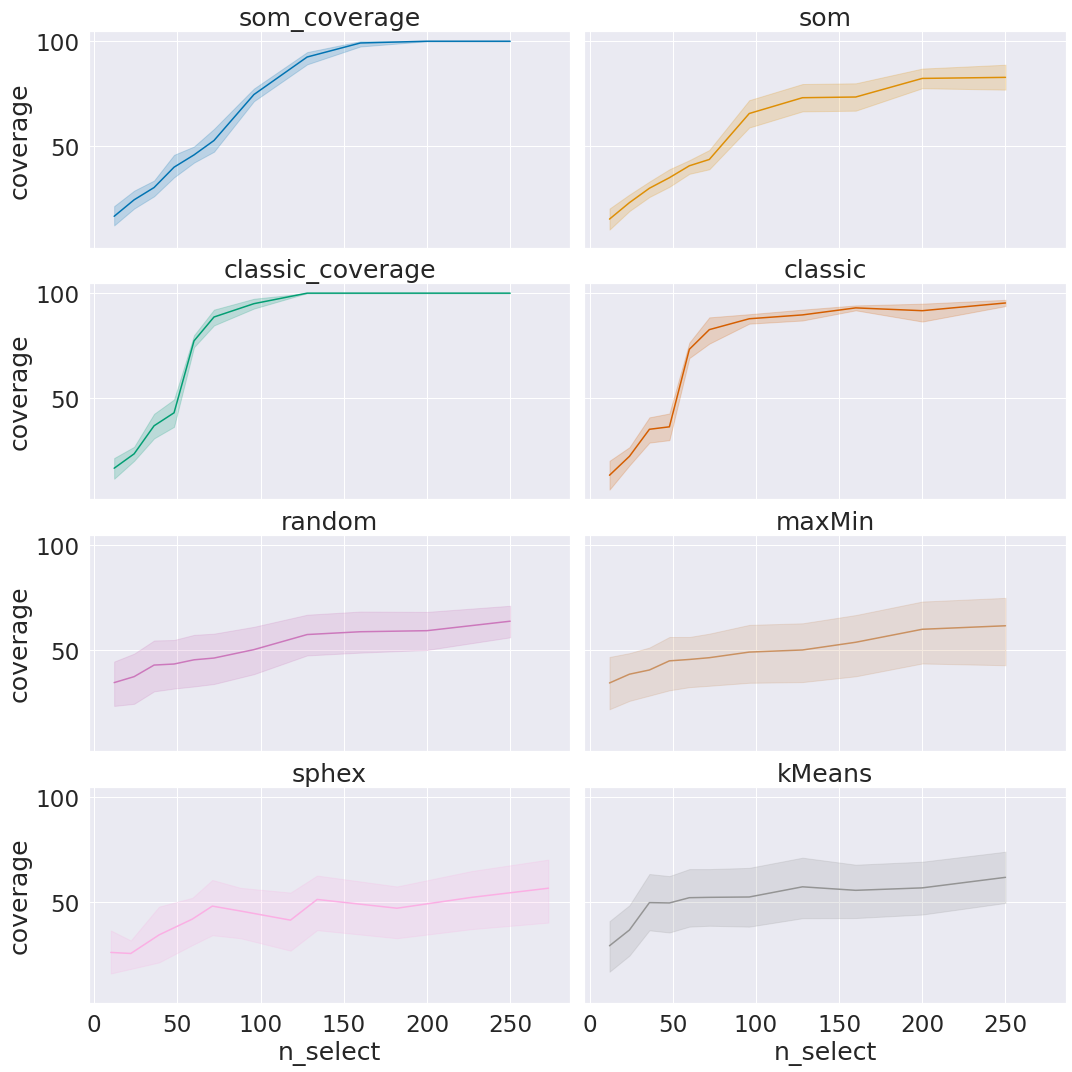

In [11]:
fig, ax = plt.subplots(4, 2, sharex = True, sharey = True, figsize=(15, 15))



for i, (axes, method) in enumerate(zip([x for xs in ax for x in xs], pivot_method_comparisons['method'].unique())):
    pivot_method_comparisons

    sns.lineplot(data = pivot_method_comparisons.query(f'method == "{method}"'), x='n_select', y = 'coverage', ax = axes, color = cp[i])
    axes.title.set_text(method)

fig.tight_layout()

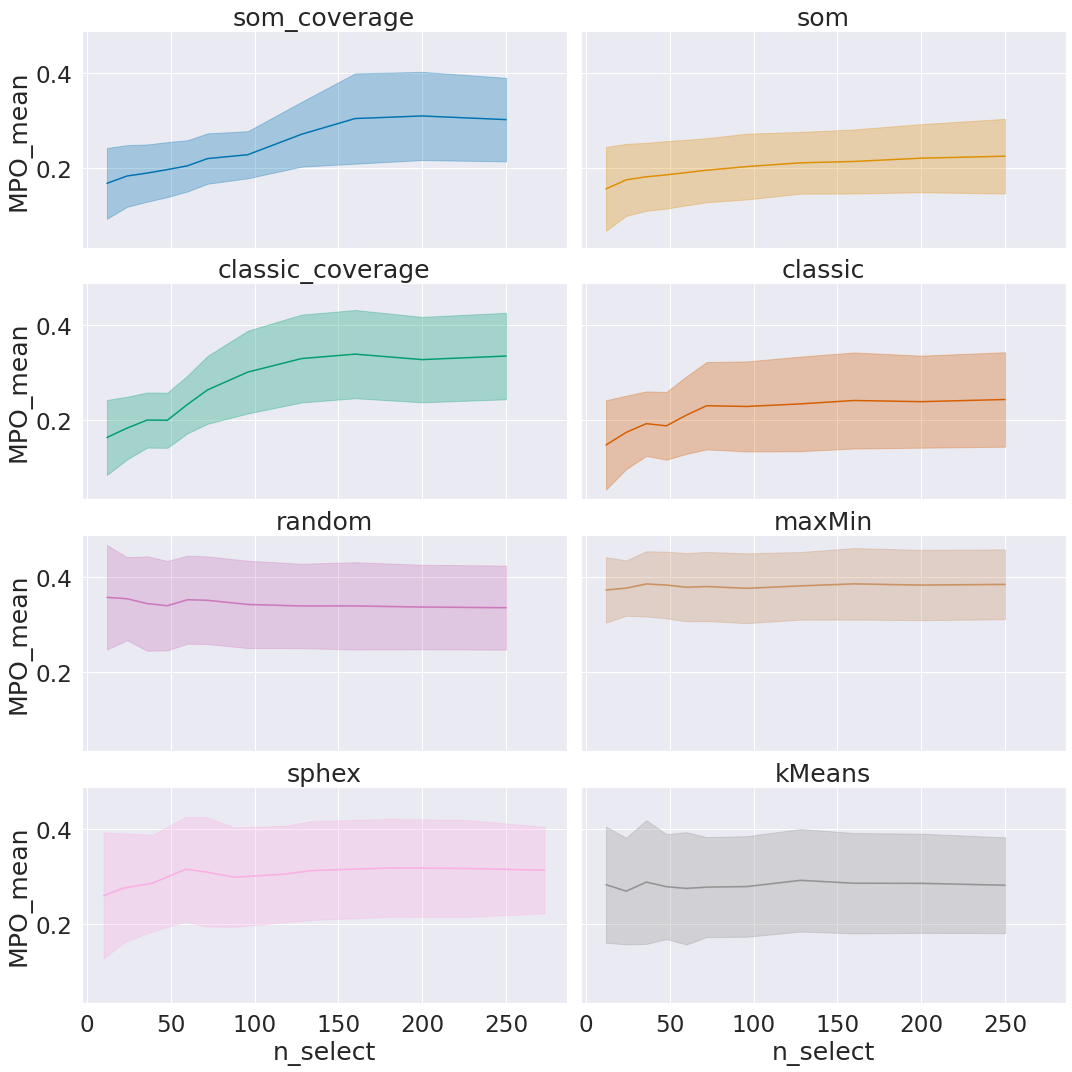

In [12]:
fig, ax = plt.subplots(4, 2, sharex = True, sharey = True, figsize=(15, 15))



for i, (axes, method) in enumerate(zip([x for xs in ax for x in xs], pivot_method_comparisons['method'].unique())):
    sns.lineplot(data = method_comparisons.query(f'method == "{method}"'), x='n_select', y = 'MPO_mean', ax = axes, color = cp[i])
    
    y_upper = method_comparisons.query(f'method == "{method}"')['MPO_mean'] + method_comparisons.query(f'method == "{method}"')['MPO_std']
    y_lower = method_comparisons.query(f'method == "{method}"')['MPO_mean'] - method_comparisons.query(f'method == "{method}"')['MPO_std']

    axes.fill_between(method_comparisons.query(f'method == "{method}"')['n_select'], y_lower, y_upper, color=cp[i], alpha=0.3)
    
    axes.title.set_text(method)

fig.tight_layout()